In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import sys
sys.path.insert(0, '/data/programs/probe_position_correction_w_ptychonn/pppc')
sys.path.insert(0, '/data/programs/probe_position_correction_w_ptychonn')
import numpy as np

import pppc
from pppc.configs import InferenceConfig
from pppc.core import PtychoNNProbePositionCorrector
from pppc.io import DataFileHandle, VirtualDataFileHandle
from pppc.reconstructor import VirtualReconstructor
from pppc.position_list import ProbePositionList
from pppc.util import class_timeit

First, test using images that were already generated using a better PtychoNN model. 

In [25]:
config_dict = InferenceConfig()
config_dict['model_path'] = None

config_dict['debug'] = False

arr = np.load('data/scan_811_high.npz')['arr_0']
arr = arr.reshape([arr.shape[0], 128, 128])
virtual_reconstructor = VirtualReconstructor(InferenceConfig())
virtual_reconstructor.set_object_image_array(arr)
config_dict['ptycho_reconstructor'] = virtual_reconstructor
config_dict['dp_data_file_handle'] = VirtualDataFileHandle('', dp_shape=arr.shape[1:], num_dps=arr.shape[0])

# Serial correction

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 962/962 [04:40<00:00,  3.43it/s]


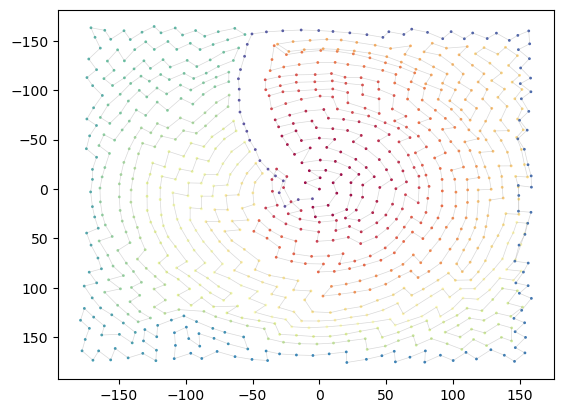

In [83]:
config_dict['debug'] = False
config_dict['method'] = 'serial'
config_dict['probe_position_list'] = None
config_dict['central_crop'] = None
config_dict['max_shift'] = 30
corrector = PtychoNNProbePositionCorrector(config_dict)
corrector.build()
corrector.run()
probe_pos_list_serial = corrector.new_probe_positions.array

# Collective correction
Use the result of serial correction for neighbor search in collective correction. 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 963/963 [07:46<00:00,  2.06it/s]


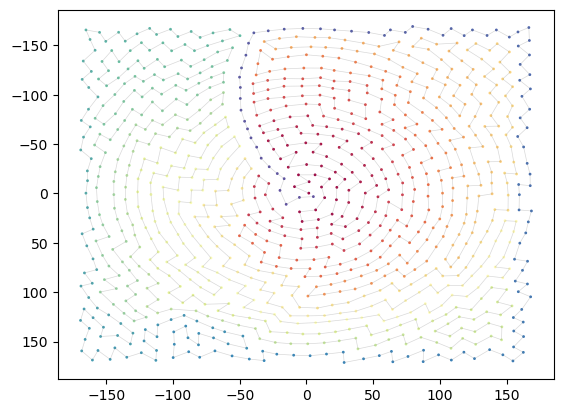

In [84]:
probe_pos_list = ProbePositionList(position_list=probe_pos_list_serial)
config_dict['probe_position_list'] = probe_pos_list
config_dict['method'] = 'collective'
#config_dict['central_crop'] = (48, 48)
corrector = PtychoNNProbePositionCorrector(config_dict)
corrector.build()
corrector.run()

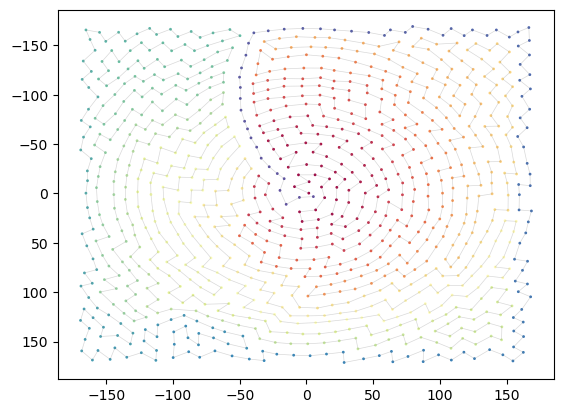

In [82]:
corrector.new_probe_positions.plot()